Problem 3

In [2]:
import pandas as pd

data = pd.read_excel(r"/content/AOLScientificComputing.xlsx")
data.head()


,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144
0,1863,1614,2570,1685,2101,1811,2457,2171,2134,2502,...,14917,15046,15556,15893,16388,16782,16716,17033,16896,17689


In [18]:
import numpy as np
import matplotlib.pyplot as plt

production_data = data.values.flatten()

months = np.arange(1, len(production_data) + 1)

coefficients = np.polyfit(months, production_data, 3)

def polynomial(month):
    return np.polyval(coefficients, month)

def solveFunction(month):
    return polynomial(month) - 25000

def bisection(g, a, b, t = 1e-5, maxIter = 10000):
    for _ in range(maxIter):
        c = (a + b) / 2.0
        if g(c) == 0 or (b - a) / 2.0 < t:
            return c
        if g(c) * g(a) < 0:
            b = c
        else:
            a = c
    return c

a = 144
b = 200
exceed = bisection(solveFunction, a, b)
startBuilding = exceed - 13
startBuilding = max(1, int(np.ceil(startBuilding)))

x = np.linspace(1, 200, 200)
y = np.polyval(coefficients, x)

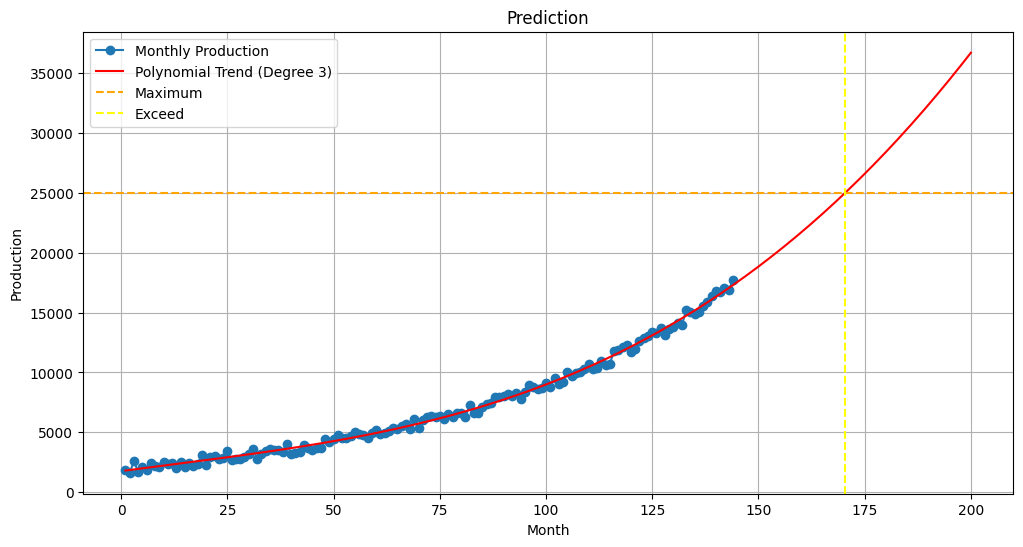

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(months, production_data, label='Monthly Production', marker = 'o')
plt.plot(x, y, label = 'Polynomial Trend (Degree 3)', color = 'red')
plt.axhline(y = 25000, color = 'orange', linestyle = '--', label = 'Maximum')
plt.axvline(x = exceed, color = 'yellow', linestyle = '--', label = 'Exceed')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Prediction')
plt.legend()
plt.grid(True)
plt.show()